In [203]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

In [204]:
# Single image path for testing
images_folder = "/Users/robertsmith/Desktop/MRI_Segmenting/SPIDER/images"
masks_folder = "/Users/robertsmith/Desktop/MRI_Segmenting/SPIDER/masks"
name = "152_t2"
ext = ".mha"
image = sitk.ReadImage(images_folder + "/" + name + ext)
mask = sitk.ReadImage(masks_folder + "/" + name + ext)

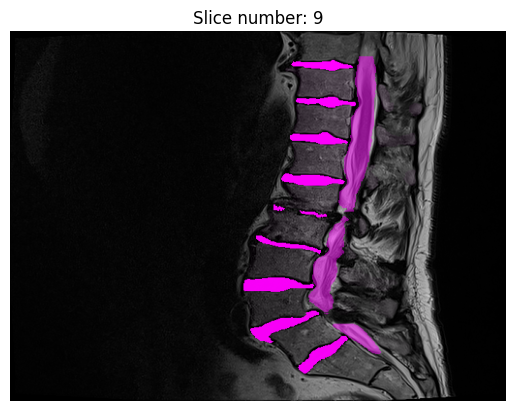

In [205]:
# Convert to numpy arrays
image_array = sitk.GetArrayFromImage(image)
mask_array = sitk.GetArrayFromImage(mask)

# Normalize the grayscale image to the range [0, 1]
image_array = image_array.astype(np.float32)
image_array -= image_array.min()
image_array /= image_array.max()

# Normalize the mask to range [0, 1] (this creates a gradient effect)
mask_array = mask_array.astype(np.float32)
mask_array -= mask_array.min()
if mask_array.max() > 0:  # Prevent division by zero
    mask_array /= mask_array.max()

# Convert grayscale image to an RGB format
image_rgb = np.stack([image_array] * 3, axis=-1)  # Shape: (depth, height, width, 3)

# Define the pink color (R=1, G=0, B=1)
pink = np.array([1, 0, 1])

# Get the middle slice index
middle_slice = image_array.shape[0] // 2

# Extract the middle slice for both image and mask
image_slice = image_rgb[middle_slice, :, :]
mask_slice = mask_array[middle_slice, :, :]

# Create a pink overlay where the mask is present with intensity proportional to mask value
for i in range(3):  # Apply the gradient mask on each color channel
    image_slice[:, :, i] = image_slice[:, :, i] * (1 - mask_slice) + pink[i] * mask_slice

# Display the resulting image
plt.imshow(image_slice, aspect='auto')
plt.title(f'Slice number: {middle_slice}')
plt.axis('off')
plt.show()